<a href="https://colab.research.google.com/github/kiranahire03/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_(Kiran_Ahire).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project 4**


# **Project Title : Extraction/identification of major topics & themes discussed in news articles.**

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **Loading Dataset and Importing Modules**

In [88]:
#Imoprting modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

from datetime import datetime
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [89]:
#load the data set from drive
customer_df=pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

## **Understanding the data**

In [90]:
#first five rows of dataset
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [91]:
#last five rows of dataset
customer_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [92]:
#Getting the shape of dataset with rows and columns
customer_df.shape

(541909, 8)

In [93]:
#Getting all the columns
print("Features of the dataset:")
customer_df.columns

Features of the dataset:


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [94]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [95]:
#print the unique value
customer_df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [96]:
#Looking for the description of the dataset to get insights of the data
customer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


## **Features Description**

* ### **InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.**
* ### **StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.**
* ### **Description: Product (item) name. Nominal.**
* ### **Quantity: The quantities of each product (item) per transaction. Numeric.**
* ### **InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated**.
* ### **UnitPrice: Unit price. Numeric, Product price per unit in sterling.**
* ### **CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.**
* ### **Country: Country name. Nominal, the name of the country where each customer resides.**

# **Preprocessing the dataset**

## **Missing values**

In [97]:
#check for count of missing values in each column.
customer_df.isna().sum()
customer_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

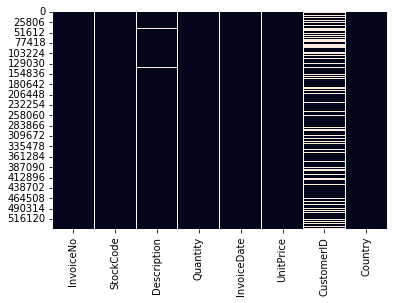

In [98]:
# Checking Null Value by plotting Heatmap
sns.heatmap(customer_df.isnull(), cbar=False)

* **There is some null value present in our dataset  in features 'CustomerID' and  'Description'** 

In [99]:
#drop the rows having null values
customer_df.dropna(inplace = True)

In [100]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [101]:
customer_df.shape

(406829, 8)

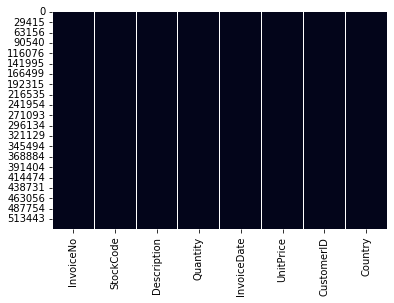

In [102]:
# Checking Null Value by plotting Heatmap
sns.heatmap(customer_df.isnull(), cbar=False)


*   **The above heatmap shows there are no null values present in dataset fter removing them.**




## **Duplicate values**

In [103]:
# Checking Duplicate Values
value=len(customer_df[customer_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  5225


In [104]:
customer_df[customer_df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [105]:
# Dropping Duplicate Rows
customer_df=customer_df.drop_duplicates()
len(customer_df[customer_df.duplicated()])

0

In [106]:
customer_df.shape

(401604, 8)

### **we have to drop some  InvoiceNo  which are starts with 'c' because 'c', it indicates a cancellation**

In [107]:
customer_df['InvoiceNo'] = customer_df['InvoiceNo'].astype('str')

In [108]:
# checking invoice no.
customer_df[customer_df['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [109]:
#removing invoiceNo starting with C
customer_df=customer_df[~customer_df['InvoiceNo'].str.contains('C')]

In [110]:
customer_df.shape

(392732, 8)

In [111]:
customer_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

### **Converting 'InvoiceDate' column into 'year','month','day','hour','minute','second'**

In [112]:
customer_df['InvoiceDate_year'] = customer_df['InvoiceDate'].dt.year
customer_df['InvoiceDate_month'] = customer_df['InvoiceDate'].dt.month
customer_df['InvoiceDate_day'] = customer_df['InvoiceDate'].dt.day
customer_df['InvoiceDate_hour'] = customer_df['InvoiceDate'].dt.hour
customer_df['InvoiceDate_minute'] = customer_df['InvoiceDate'].dt.minute
customer_df['InvoiceDate_second'] = customer_df['InvoiceDate'].dt.second

In [113]:
print("Columns and data types")
pd.DataFrame(customer_df.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object
InvoiceDate_year,int64
InvoiceDate_month,int64


In [114]:
customer_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceDate_year',
       'InvoiceDate_month', 'InvoiceDate_day', 'InvoiceDate_hour',
       'InvoiceDate_minute', 'InvoiceDate_second'],
      dtype='object')

In [115]:
customer_df.shape

(392732, 14)

# **Exploratory Data Analysis**

### **Analysis of 'CustomerID'**

In [116]:
# let us see the unique ids of customers
print('The no. of customers = ',customer_df['CustomerID'].nunique())

The no. of customers =  4339


**We have total 392732 customers but there are only 4339 customers so lets find how many active customers are present.**

In [117]:
# finding most active customer
active_customers=pd.DataFrame(customer_df['CustomerID'].value_counts().sort_values(ascending=False).reset_index())
active_customers.rename(columns={'index':'CustomerID','CustomerID':'Count'},inplace=True)
active_customers

,CustomerID,Count
0,17841.0,7676
1,14911.0,5672
2,14096.0,5111
3,12748.0,4413
4,14606.0,2677
...,...,...
4334,16990.0,1
4335,13302.0,1
4336,13017.0,1
4337,17923.0,1


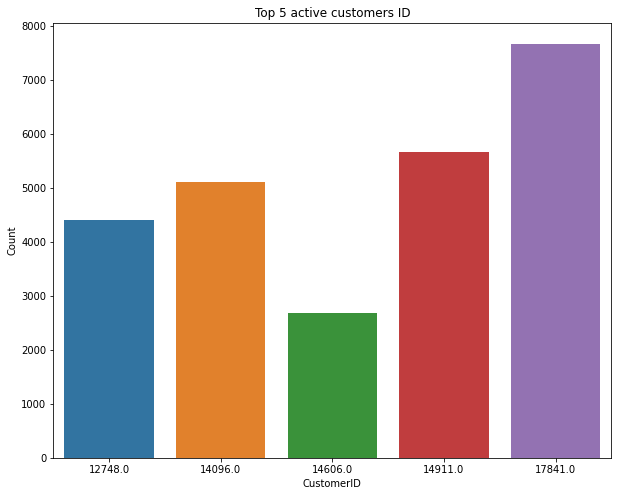

In [118]:
plt.figure(figsize=(10,8))
plt.title('Top 5 active customers ID')
sns.barplot(x='CustomerID',y='Count',data=active_customers[:5])

## **Analysis of  Categorical Features**

In [119]:
categorical_columns=list(customer_df.select_dtypes(['object']).columns)
categorical_features=pd.Index(categorical_columns)
categorical_features

Index(['InvoiceNo', 'StockCode', 'Description', 'Country'], dtype='object')

## **Analysis of 'Description'** 

In [120]:
Description_df=customer_df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)

In [121]:
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1714
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1390


In [122]:
Description_df.tail()

,Description_Name,Count
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


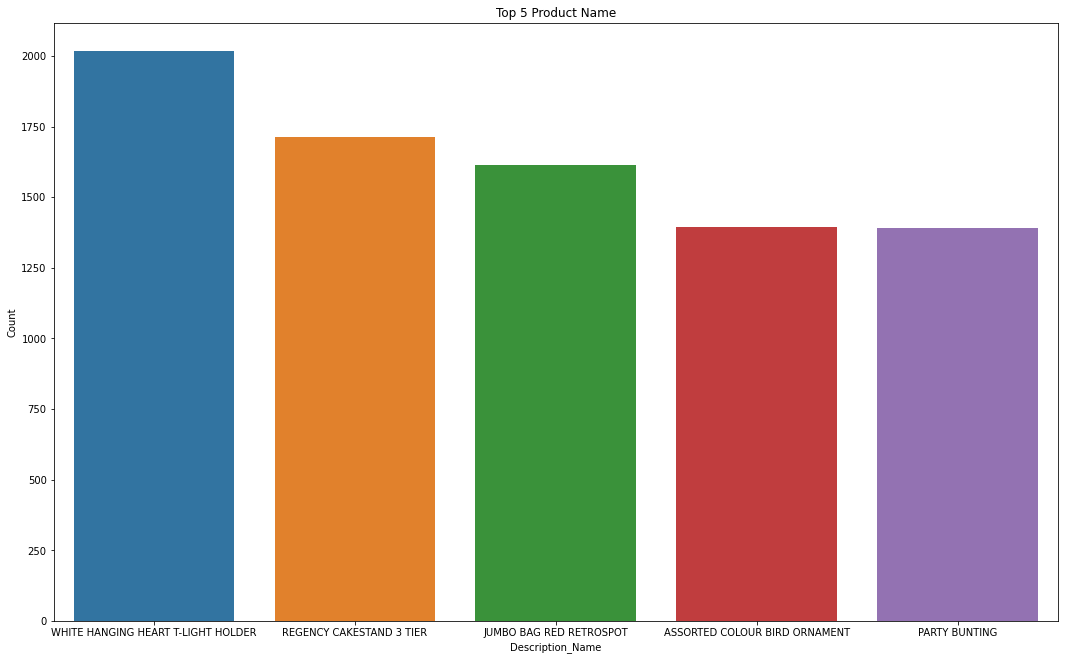

In [123]:
plt.figure(figsize=(18,11))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5])

## **Analysis of 'StockCode'**

In [124]:
StockCode_df=customer_df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)

In [125]:
StockCode_df.head()

,StockCode_Name,Count
0,85123A,2023
1,22423,1714
2,85099B,1615
3,84879,1395
4,47566,1390


In [126]:
StockCode_df.tail()

,StockCode_Name,Count
3660,20678,1
3661,90059D,1
3662,90168,1
3663,90169,1
3664,23843,1


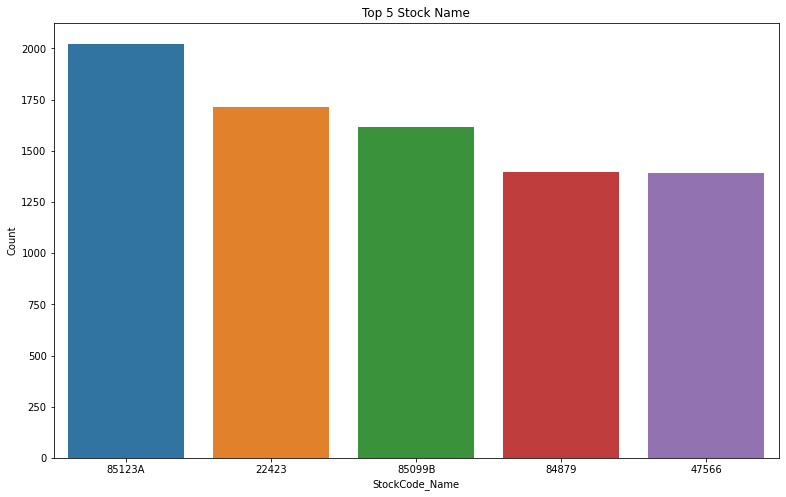

In [127]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[:5])

## **Analysis of 'Country'**

In [128]:
country_df=customer_df['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)

In [129]:
country_df.head()

,Country_Name,Count
0,United Kingdom,349227
1,Germany,9027
2,France,8327
3,EIRE,7228
4,Spain,2480


In [130]:
country_df.tail()

,Country_Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


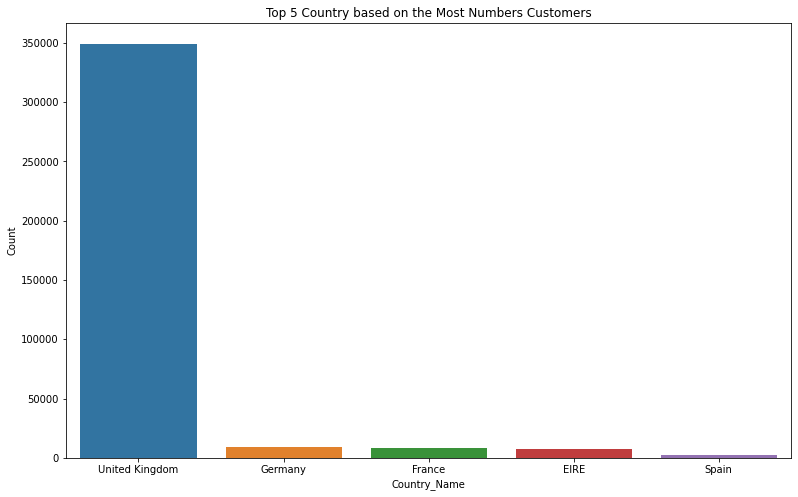

In [131]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[:5])

**From this graph we can see that most of the customers are from United Kingdom ,Germany ,France ,EIRE and Spain**

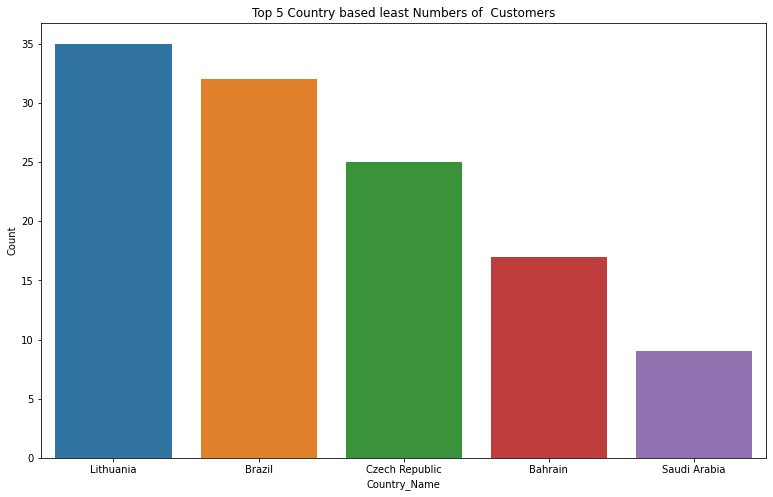

In [132]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Country based least Numbers of  Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[-5:])

**From this graph we can see that least number of customers from Lithuania,Brazil, Czech Republic ,Bahrain  and Saudi Arabia**

## **Analysis Numeric Features**

In [133]:
numerical_columns=list(customer_df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Quantity', 'UnitPrice', 'CustomerID', 'InvoiceDate_year',
       'InvoiceDate_month', 'InvoiceDate_day', 'InvoiceDate_hour',
       'InvoiceDate_minute', 'InvoiceDate_second'],
      dtype='object')

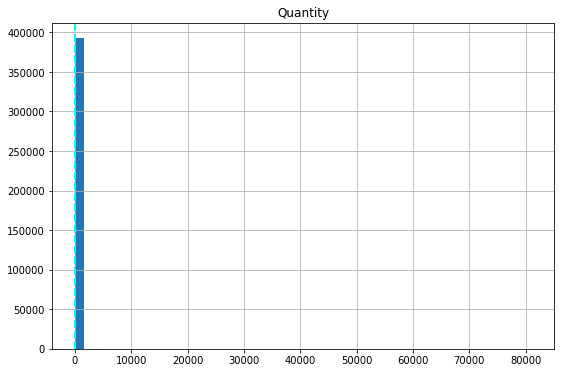

Skewness : 400.8117144489054
Kurtosis : 171772.12450262278


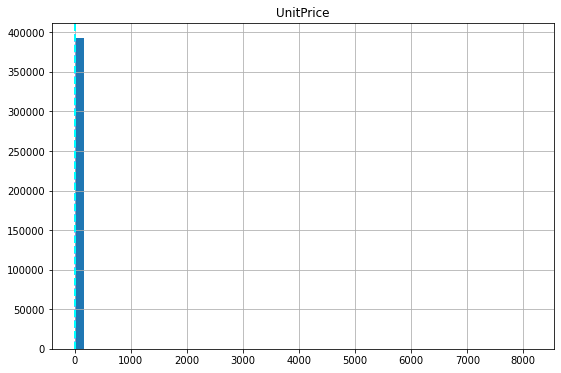

Skewness : 202.75061725718567
Kurtosis : 57403.96255594054


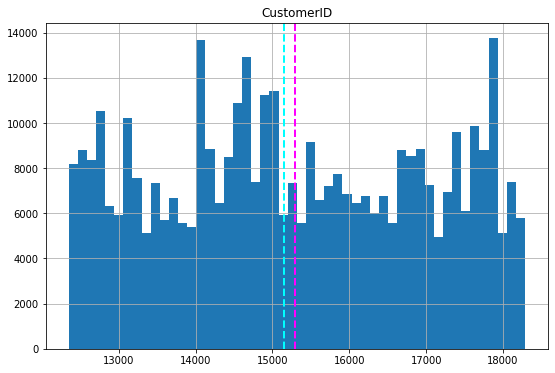

Skewness : 0.0301953601721347
Kurtosis : -1.1807001644923933


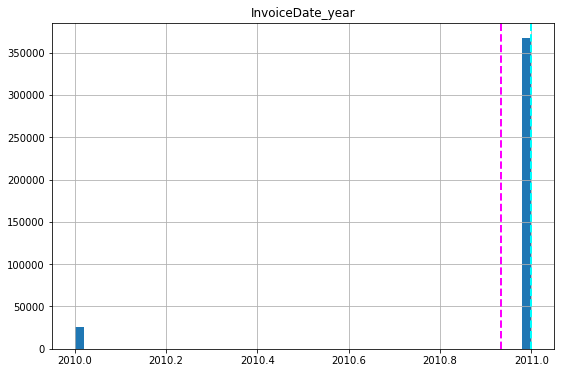

Skewness : -3.5167469285537045
Kurtosis : 10.367561756595565


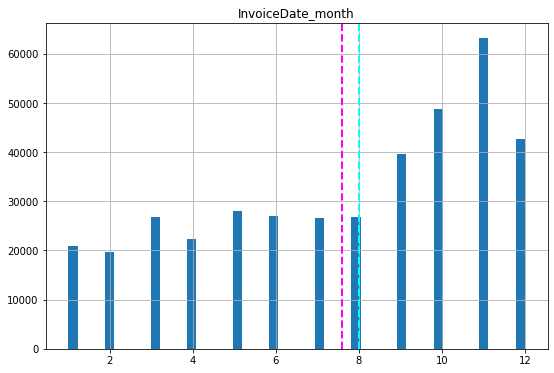

Skewness : -0.44039649840565165
Kurtosis : -1.0764781956797629


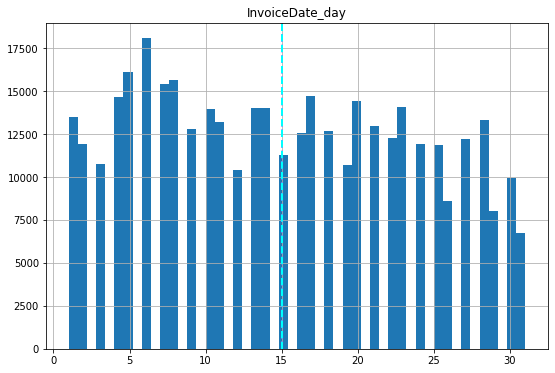

Skewness : 0.11441497180759913
Kurtosis : -1.1716768778411122


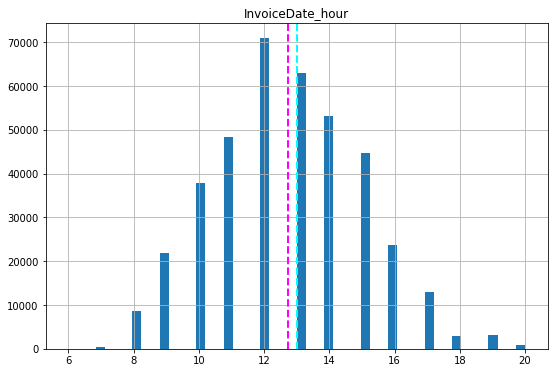

Skewness : 0.18708090962435506
Kurtosis : -0.22002250912534427


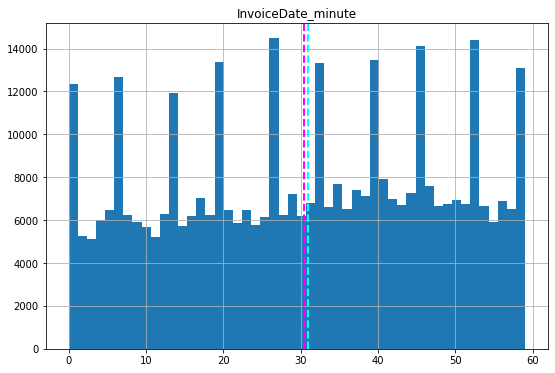

Skewness : -0.08049184573623291
Kurtosis : -1.1661140967814052


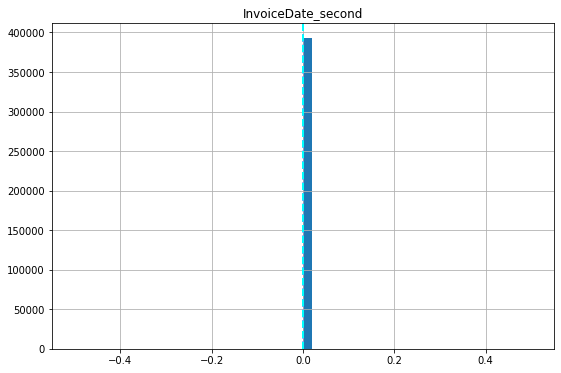

Skewness : 0
Kurtosis : 0


In [134]:
#plot a bar plot for each numerical feature count with Hist Plot (except car_ID)
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (customer_df[col])
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",customer_df[col].skew())
  print( "Kurtosis :",customer_df[col].kurt())

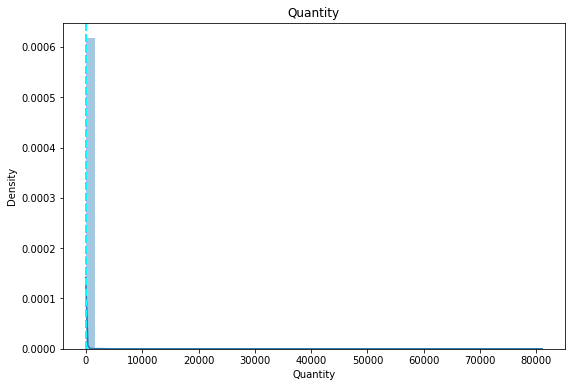

Skewness : 400.8117144489054
Kurtosis : 171772.12450262278


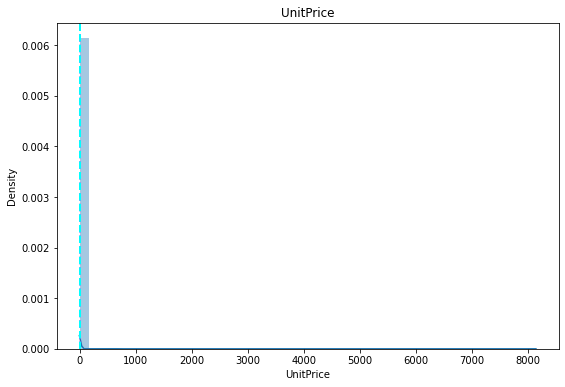

Skewness : 202.75061725718567
Kurtosis : 57403.96255594054


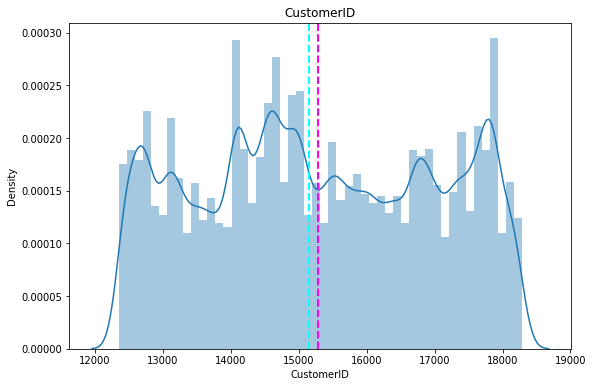

Skewness : 0.0301953601721347
Kurtosis : -1.1807001644923933


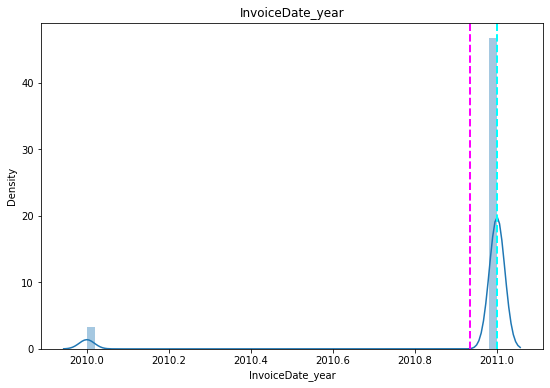

Skewness : -3.5167469285537045
Kurtosis : 10.367561756595565


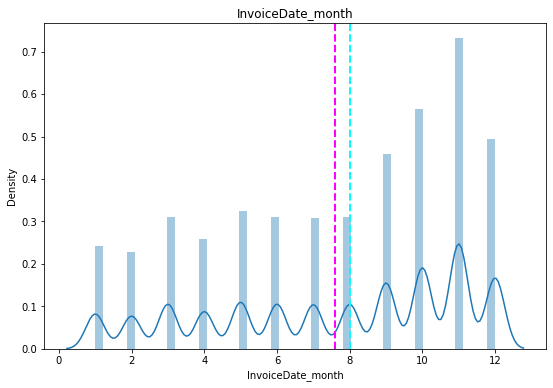

Skewness : -0.44039649840565165
Kurtosis : -1.0764781956797629


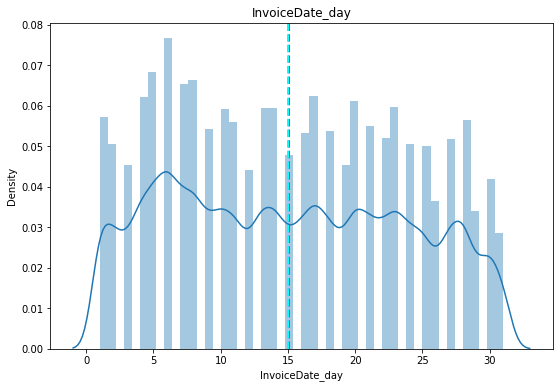

Skewness : 0.11441497180759913
Kurtosis : -1.1716768778411122


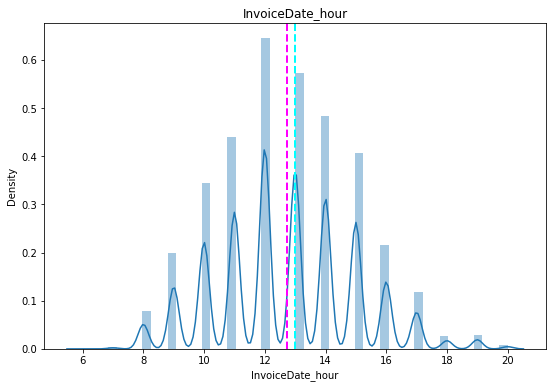

Skewness : 0.18708090962435506
Kurtosis : -0.22002250912534427


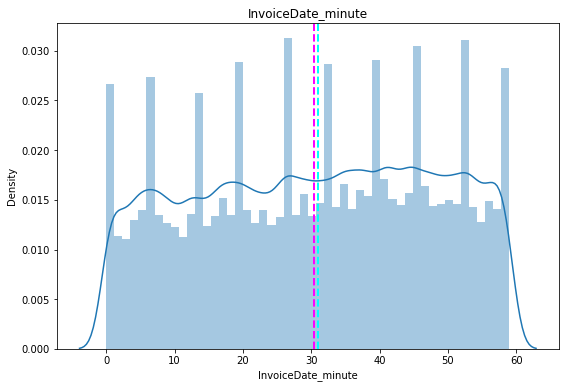

Skewness : -0.08049184573623291
Kurtosis : -1.1661140967814052


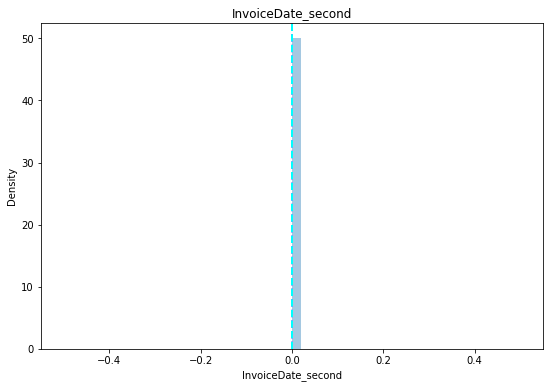

Skewness : 0
Kurtosis : 0


In [135]:
#plot a bar plot for each numerical feature count with Dist Plot
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (customer_df[col])
  sns.distplot(customer_df[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",customer_df[col].skew())
  print( "Kurtosis :",customer_df[col].kurt())

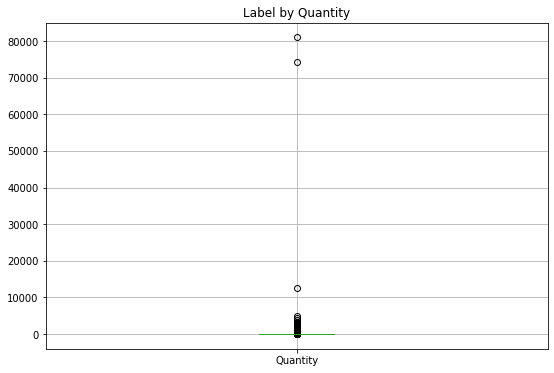

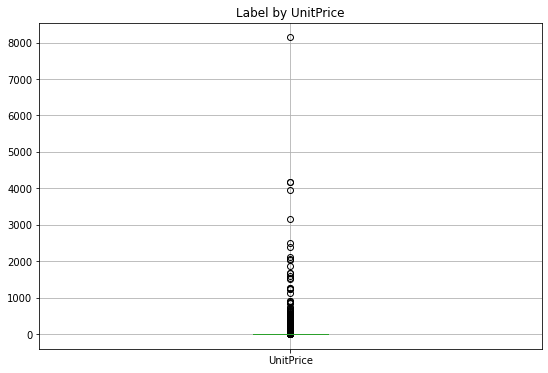

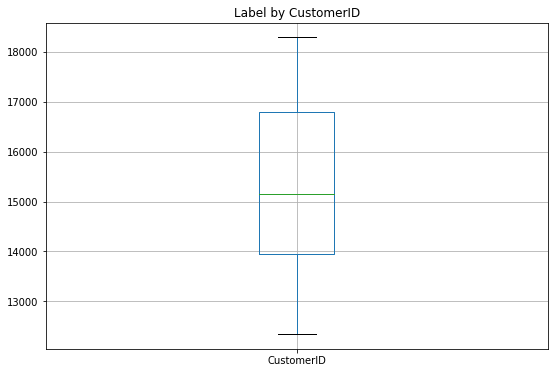

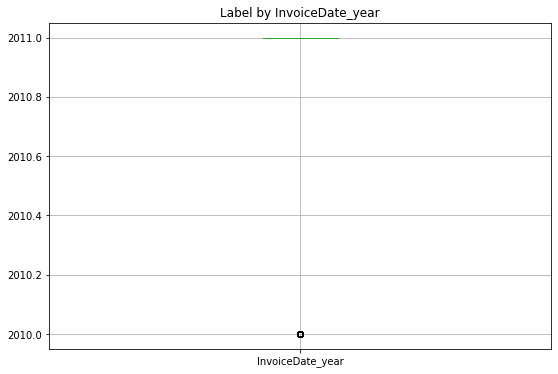

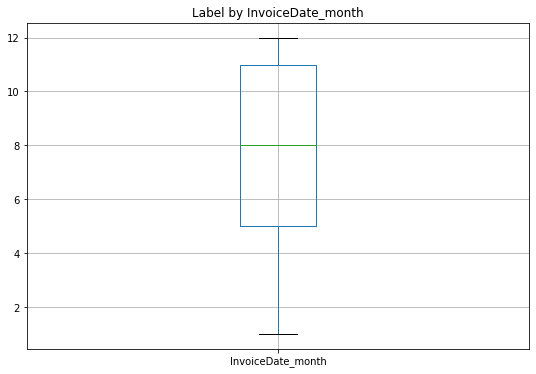

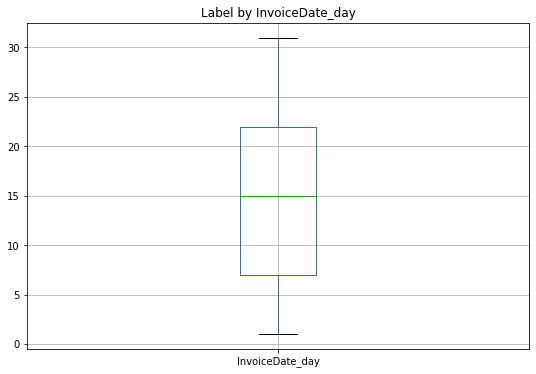

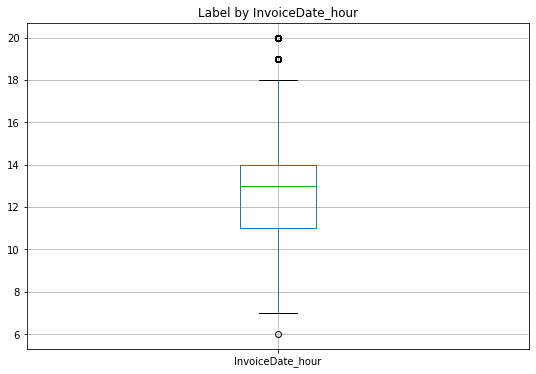

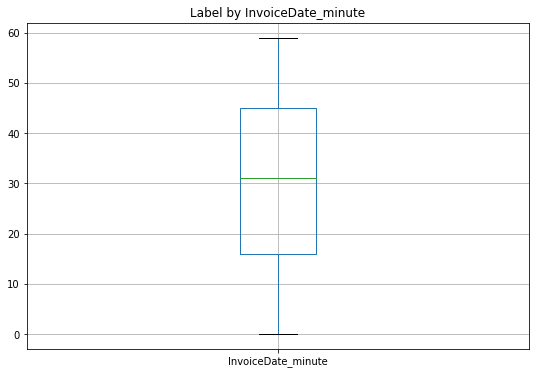

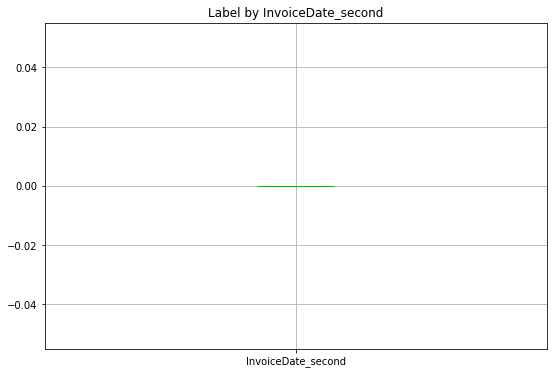

In [136]:
# plot a boxplot for the label by each numerical feature  

for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    customer_df.boxplot(col)
    ax.set_title('Label by ' + col)
plt.show()

##**Correlation between variables**

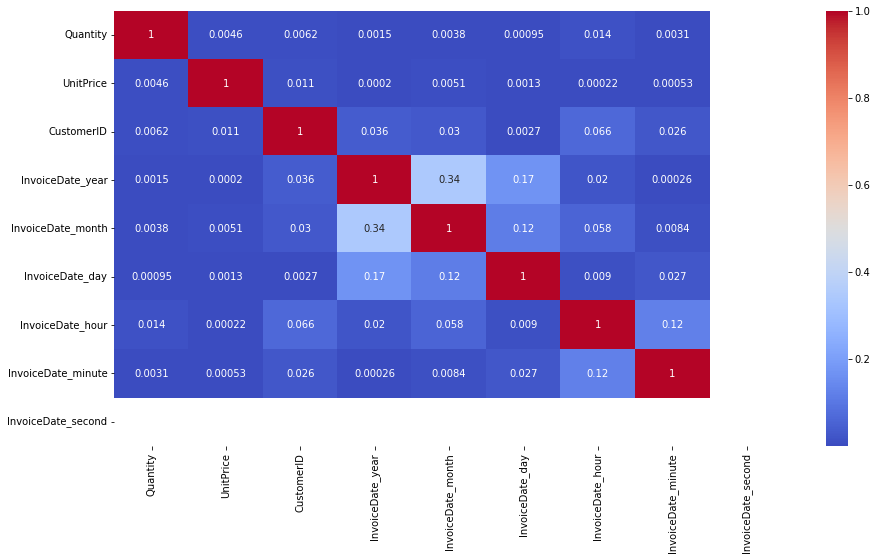

In [137]:
## Correlation
plt.figure(figsize=(15,8))
correlation=customer_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

#**Feature engineering**

**Create a new feature 'Day' from InvoiceDate**

In [138]:
customer_df['Day'] = customer_df['InvoiceDate'].dt.day_name()

**Create a new features TotalAmount from form product of Quantity and Unitprice**

In [139]:
customer_df['TotalAmount']=customer_df['Quantity']*customer_df['UnitPrice']

In [140]:
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year,InvoiceDate_month,InvoiceDate_day,InvoiceDate_hour,InvoiceDate_minute,InvoiceDate_second,Day,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,0,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,0,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0,Wednesday,20.34


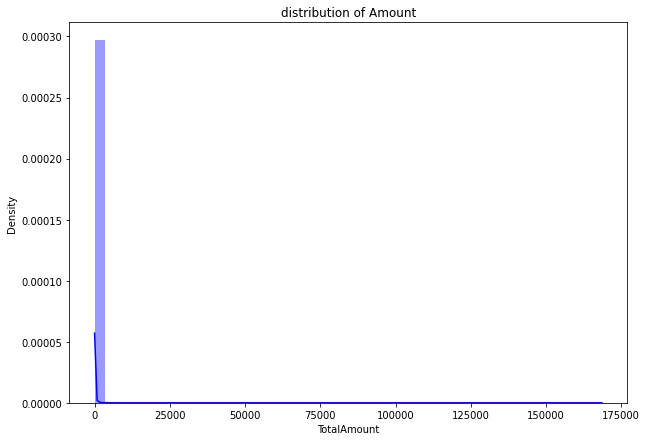

In [141]:
plt.figure(figsize=(10,7))
plt.title('distribution of Amount')
sns.distplot(customer_df['TotalAmount'],color="B")

In [142]:
customer_df['TotalAmount'].describe()

count    392732.000000
mean         22.629195
std         311.083465
min           0.000000
25%           4.950000
50%          12.390000
75%          19.800000
max      168469.600000
Name: TotalAmount, dtype: float64

In [143]:
day_df=customer_df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

,Day_Name,Count
0,Thursday,79260
1,Wednesday,68043
2,Tuesday,65747
3,Monday,64237
4,Sunday,61214
5,Friday,54231


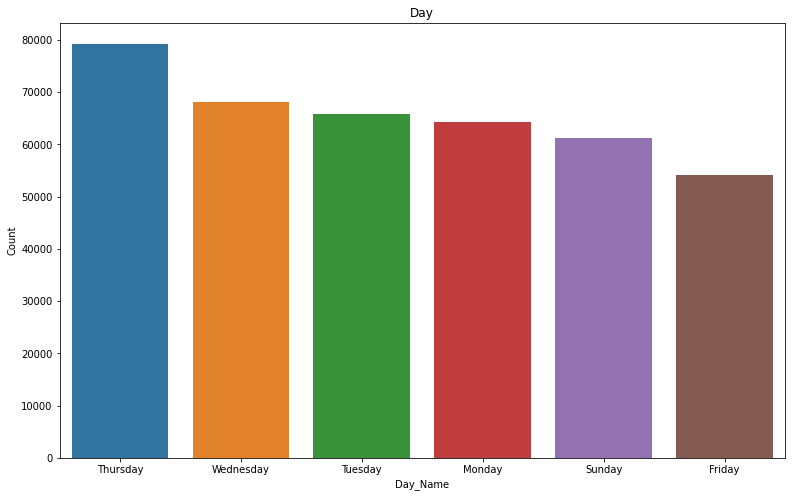

In [144]:
plt.figure(figsize=(13,8))
plt.title('Day')
sns.barplot(x='Day_Name',y='Count',data=day_df)

* **From the above bar plot we can see that most of the customers have purches the items in Thursday ,Wednesday and Tuesday**

In [145]:
month_df=customer_df['InvoiceDate_month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'InvoiceDate_month': 'Count'}, inplace=True)
month_df

,Month_Name,Count
0,11,63182
1,10,48796
2,12,42699
3,9,39671
4,5,28075
5,6,26926
6,3,26872
7,8,26796
8,7,26582
9,4,22435


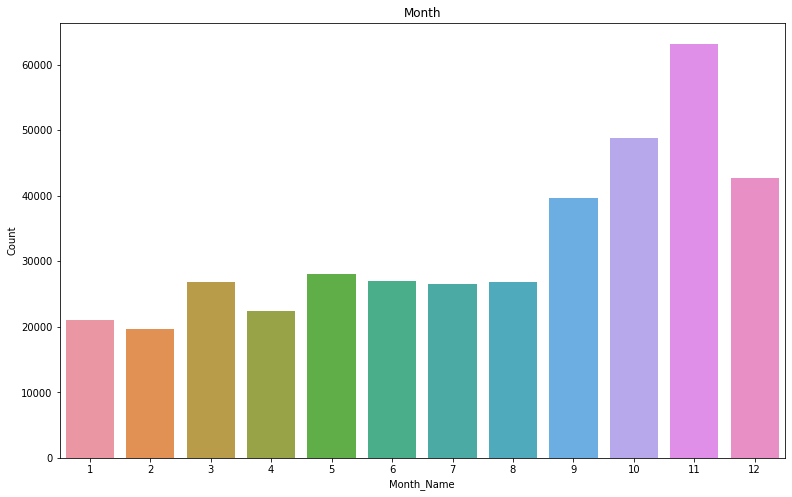

In [146]:
plt.figure(figsize=(13,8))
plt.title('Month')
sns.barplot(x='Month_Name',y='Count',data=month_df)

**From the above bar plot we can see that most of the items purchase in the month of November followed by October and December.** 

# **RFM Model**

**RFM model which stands for Recency, Frequency, and Monetary is one of such steps in which we determine the recency - days to last visit, frequency - how actively the customer repurchases and monetary - total expenditure of the customer, for each customer**

**RFM analysis allows marketers to target specific clusters of customers with communications that are much more relevant for their particular behavior – and thus generate much higher rates of response, plus increased loyalty and customer lifetime value**

* **Recency = Latest Date - Last Inovice Data,**
* **Frequency = count of invoice no. of transaction(s),** 
* **Monetary = Sum of Total Amount for each customer**

In [147]:
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = customer_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [148]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()

count    4339.000000
mean       92.041484
std       100.007757
min         0.000000
25%        17.000000
50%        50.000000
75%       141.500000
max       373.000000
Name: Recency, dtype: float64

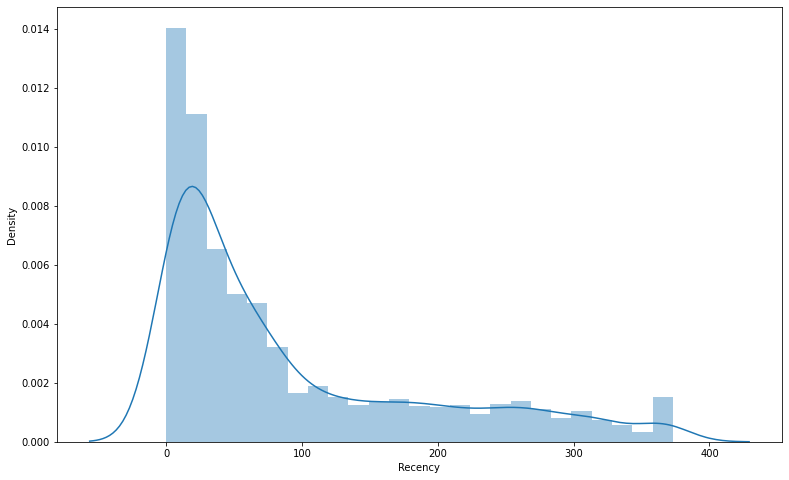

In [149]:
#Recency distribution plot
x = rfm_df['Recency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [150]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

count    4339.000000
mean       90.512100
std       225.515328
min         1.000000
25%        17.000000
50%        41.000000
75%        98.000000
max      7676.000000
Name: Frequency, dtype: float64

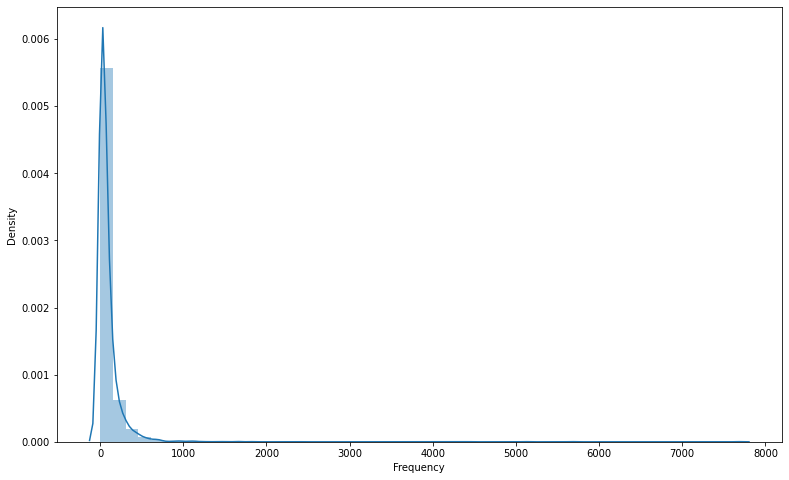

In [151]:
#Frequency distribution plot, taking observations which have frequency less than 1000
x = rfm_df['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [152]:
#Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()

count      4339.000000
mean       2048.215924
std        8984.248352
min           0.000000
25%         306.455000
50%         668.560000
75%        1660.315000
max      280206.020000
Name: Monetary, dtype: float64

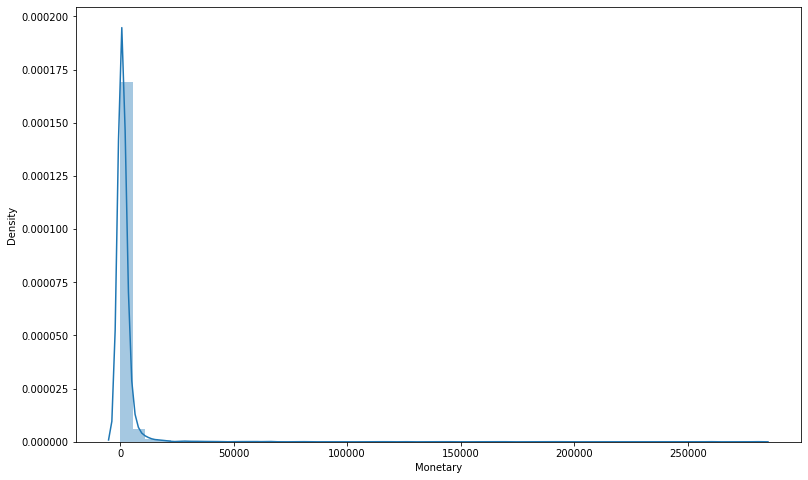

In [153]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
x = rfm_df['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(x)

####**Split into four segments using quantiles**

In [154]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [155]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 306.45500000000004,
  0.5: 668.5600000000002,
  0.75: 1660.315}}

In [156]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [157]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [158]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [159]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

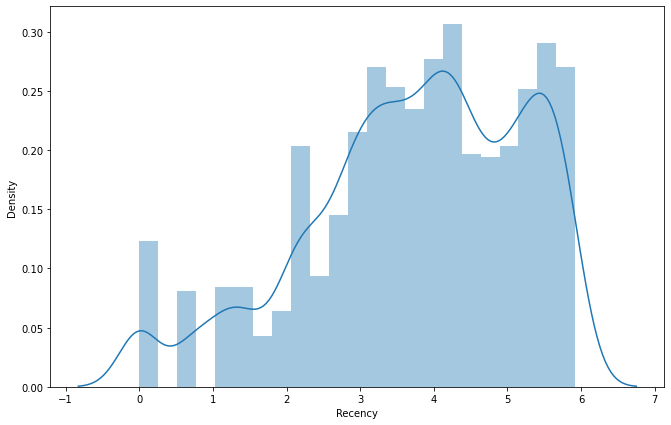

In [160]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(11,7))
sns.distplot(Recency_Plot)

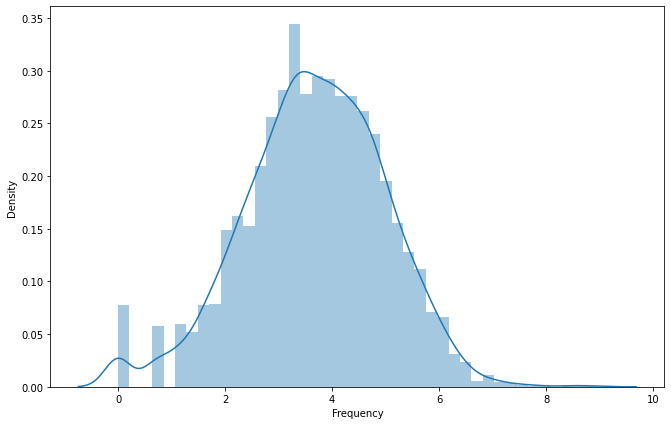

In [161]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(11,7))
sns.distplot(Frequency_Plot)

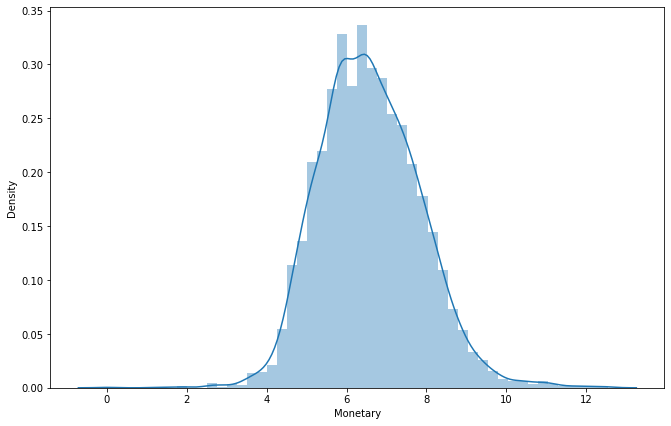

In [162]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(11,7))
sns.distplot(Monetary_Plot)

In [168]:
from sklearn import preprocessing
rfm_df['Recency_log'] = rfm_df['Recency'].apply(log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(log)
